In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("final_dataset_merged.csv")

print("Veri seti yüklendi.")
display(df.head())

Veri seti yüklendi.


,code,label,source,license,filename,class_name
0,import argparse\n\ndef handle_greet(args):\n ...,1,Gemini-2.5-Flash,Generated,cli.py,AI
1,# Take a screenshot of the screen\nimport json...,0,https://github.com/Blaizzy/mlx-vlm,MIT,autonomous_gui_agent.py,Human
2,import logging\nimport os\nimport json\nimport...,0,https://github.com/scottrogowski/code2flow,MIT,javascript.py,Human
3,from .utils import md\n\n\ndef test_chomp():\n...,0,https://github.com/matthewwithanm/python-markd...,MIT,test_advanced.py,Human
4,"""minesweeper""\nfrom UserDict import UserDict\n...",0,https://github.com/ActiveState/code,MIT,recipe-101853.py,Human


VERİ RAPORU
Toplam veri sayısı 10002
Eksik veri var mı : 0
Tekrarlayan kod sayısı : 29
Tekrarlayan veriler siliniyor.
Yeni veri sayısı : 9973

 Öznitelikler çıkarılıyor


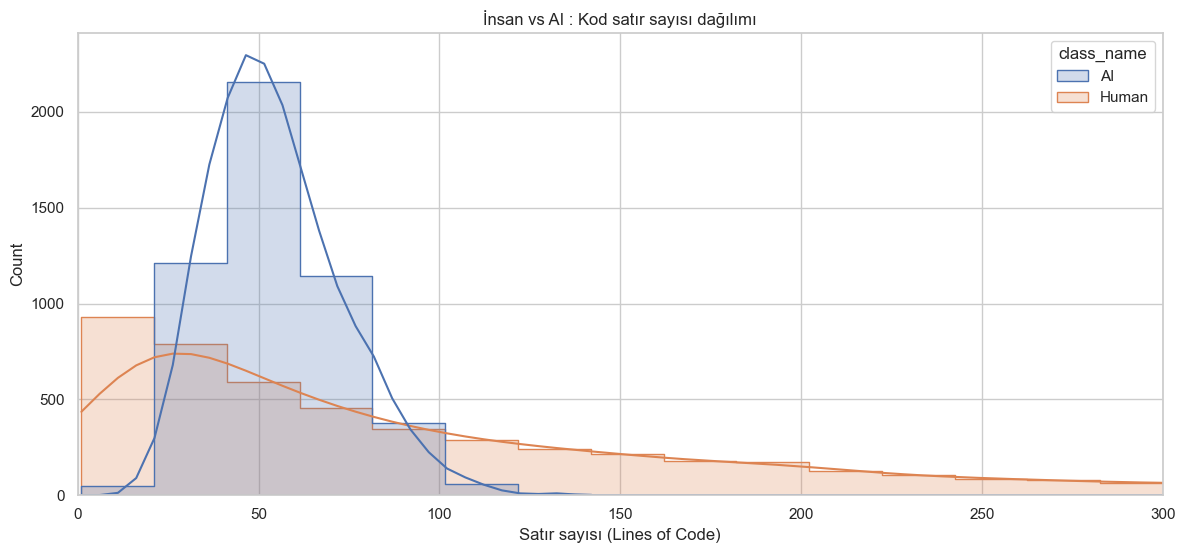

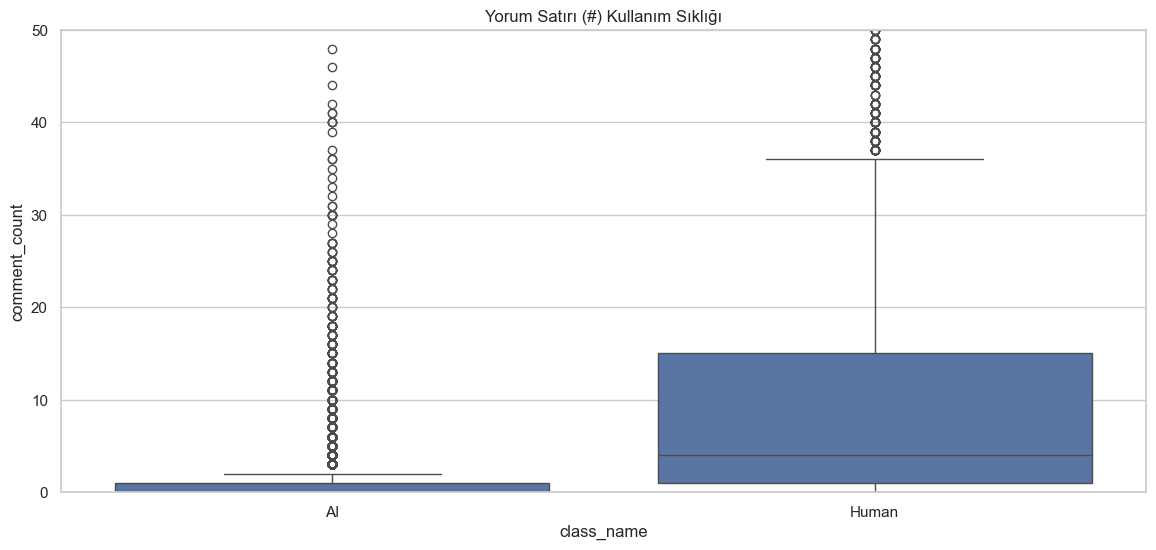

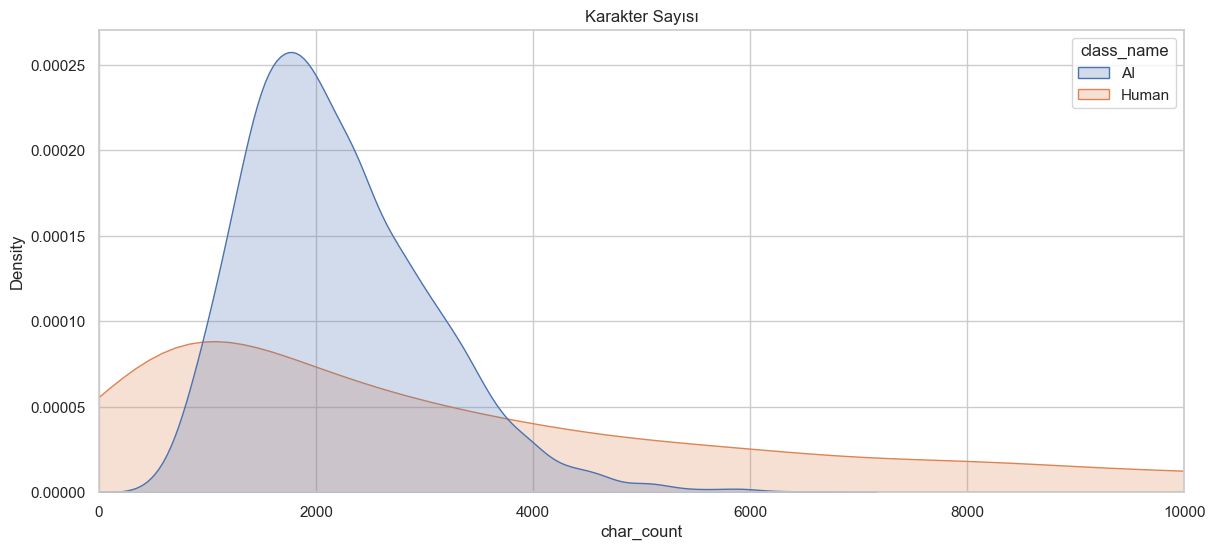

İSTATİSTİKSEL KARŞILAŞTIRMA
                   loc   char_count  comment_count
class_name                                        
AI           54.681864  2194.879024       1.921016
Human       104.934031  4378.198109      17.686846


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style = "whitegrid")
plt.rcParams['figure.figsize'] = (14 , 6)

df = pd.read_csv("final_dataset_merged.csv")

print("VERİ RAPORU")
print(f"Toplam veri sayısı {len(df)}")
print(f"Eksik veri var mı : {df.isnull().sum().sum()}")

duplicates = df.duplicated(subset = ['code']).sum()
print(f"Tekrarlayan kod sayısı : {duplicates}")

if duplicates > 0:
    print(f"Tekrarlayan veriler siliniyor.")
    df.drop_duplicates(subset=['code'] , inplace=True)
    print(f"Yeni veri sayısı : {len(df)}")

yeni_dosya_adi = "02_tekrar_eden_veriler_silindi_final_dataset_merged.csv"
df.to_csv(yeni_dosya_adi , index=False)

def get_code_features(text):
    lines = text.split('\n')

    loc = len([line for line in lines if line.strip() != ''])

    char_count = len(text)

    comment_count = text.count('#')

    avg_line_len = char_count / loc if loc > 0 else 0

    return pd.Series([loc , char_count , comment_count , avg_line_len])

print("\n Öznitelikler çıkarılıyor")
df[['loc' , 'char_count' , 'comment_count' , 'avg_line_len']] = df['code'].apply(get_code_features)
#Kod Uzunluğu Dağılımı
plt.figure()
sns.histplot(data = df , x = 'loc' , hue = 'class_name' , kde = True , element = "step" , bins=50)
plt.title('İnsan vs AI : Kod satır sayısı dağılımı')
plt.xlabel('Satır sayısı (Lines of Code)')
plt.xlim(0 , 300)
plt.show()

#Yorum satırı kullanımı

plt.figure()
sns.boxplot(x = 'class_name' , y = 'comment_count' , data = df)
plt.title('Yorum Satırı (#) Kullanım Sıklığı')
plt.ylim(0,50)
plt.show()

#Karakter sayısı yoğunluğu 

plt.figure()
plt.title('Karakter Sayısı')
sns.kdeplot(data = df , x = 'char_count' , hue = 'class_name' , fill = True)
plt.xlim(0 , 10000)
plt.show()

print("İSTATİSTİKSEL KARŞILAŞTIRMA")
print(df.groupby('class_name')[['loc' , 'char_count' , 'comment_count']].mean())